<a href="https://colab.research.google.com/github/Ameer-Mohammed/test2/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Ameer-Mohammed/test2/main/Date_Fruit_Datasets_Pca.csv')
df.head(n=25)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281,0.9970,452755,0
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880,0.9931,385277,0
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,0
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116,0.9918,423531,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          898 non-null    int64  
 1   PERIMETER     898 non-null    float64
 2   MAJOR_AXIS    898 non-null    float64
 3   MINOR_AXIS    898 non-null    float64
 4   ECCENTRICITY  898 non-null    float64
 5   EQDIASQ       898 non-null    float64
 6   SOLIDITY      898 non-null    float64
 7   CONVEX_AREA   898 non-null    int64  
 8   Class         898 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 63.3 KB


# Classes

In [70]:
y = df['Class']
target = df['Class'].to_numpy()

# Features
Data Matrix

In [71]:
X = df.iloc[:,0:6]
X.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116


In [56]:

X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,298295.207127,107245.205337,1987.0000,206948.000000,319833.00000,382573.000000,546063.0000
PERIMETER,898.0,2057.660953,410.012459,911.8280,1726.091500,2196.34545,2389.716575,2811.9971
MAJOR_AXIS,898.0,750.811994,144.059326,336.7227,641.068650,791.36340,858.633750,1222.7230
MINOR_AXIS,898.0,495.872785,114.268917,2.2832,404.684375,495.05485,589.031700,766.4536
ECCENTRICITY,898.0,0.737468,0.088727,0.3448,0.685625,0.75470,0.802150,1.0000
EQDIASQ,898.0,604.577938,119.593888,50.2984,513.317075,638.14095,697.930525,833.8279


Standardize the data

In [57]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.215501e-16,1.000557,-2.764444,-0.852235,0.200939,0.786280,2.311580
PERIMETER,898.0,3.165001e-17,1.000557,-2.796187,-0.809132,0.338433,0.810318,1.840814
MAJOR_AXIS,898.0,5.697002e-16,1.000557,-2.876038,-0.762217,0.281648,0.748871,3.277636
MINOR_AXIS,898.0,-1.582501e-17,1.000557,-4.321951,-0.798461,-0.007162,0.815715,2.369250
ECCENTRICITY,898.0,-3.798001e-16,1.000557,-4.428020,-0.584619,0.194323,0.729405,2.960512
EQDIASQ,898.0,-1.899001e-16,1.000557,-4.637264,-0.763515,0.280798,0.781015,1.917972


#Observations and variables

In [58]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Data Visualisation


Class Distribution


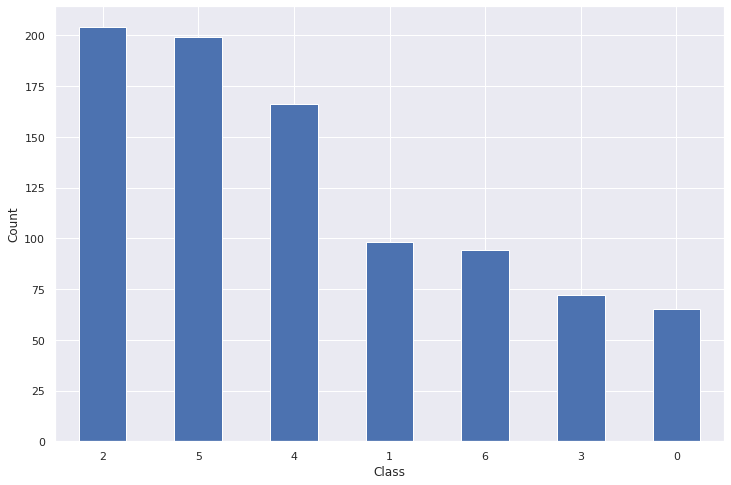

In [59]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Box & Whisker Plots


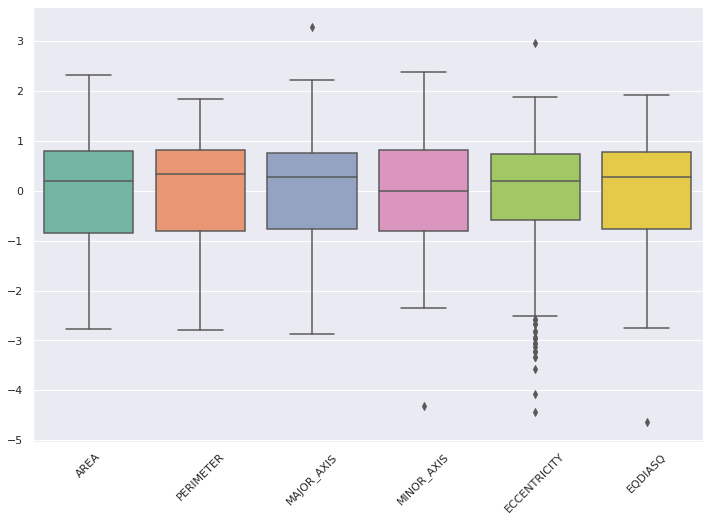

In [60]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


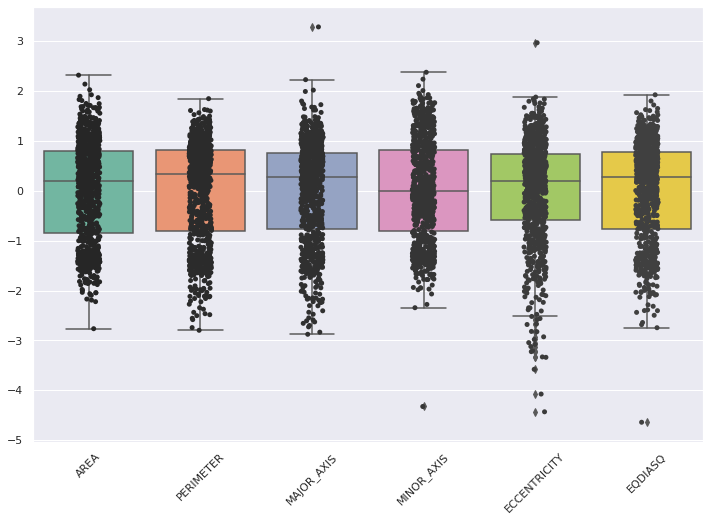

In [11]:
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

# Five Number Summary


In [12]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ
count,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02
mean,2.215501e-16,3.165001e-17,5.697002e-16,-1.582501e-17,-3.798001e-16,-1.899001e-16
std,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00
min,-2.764444e+00,-2.796187e+00,-2.876038e+00,-4.321951e+00,-4.428020e+00,-4.637264e+00
25%,-8.522349e-01,-8.091321e-01,-7.622172e-01,-7.984606e-01,-5.846189e-01,-7.635149e-01
50%,2.009395e-01,3.384331e-01,2.816479e-01,-7.161974e-03,1.943232e-01,2.807979e-01
75%,7.862800e-01,8.103185e-01,7.488709e-01,8.157146e-01,7.294053e-01,7.810149e-01
max,2.311580e+00,1.840814e+00,3.277636e+00,2.369250e+00,2.960512e+00,1.917972e+00


# Pair Plot


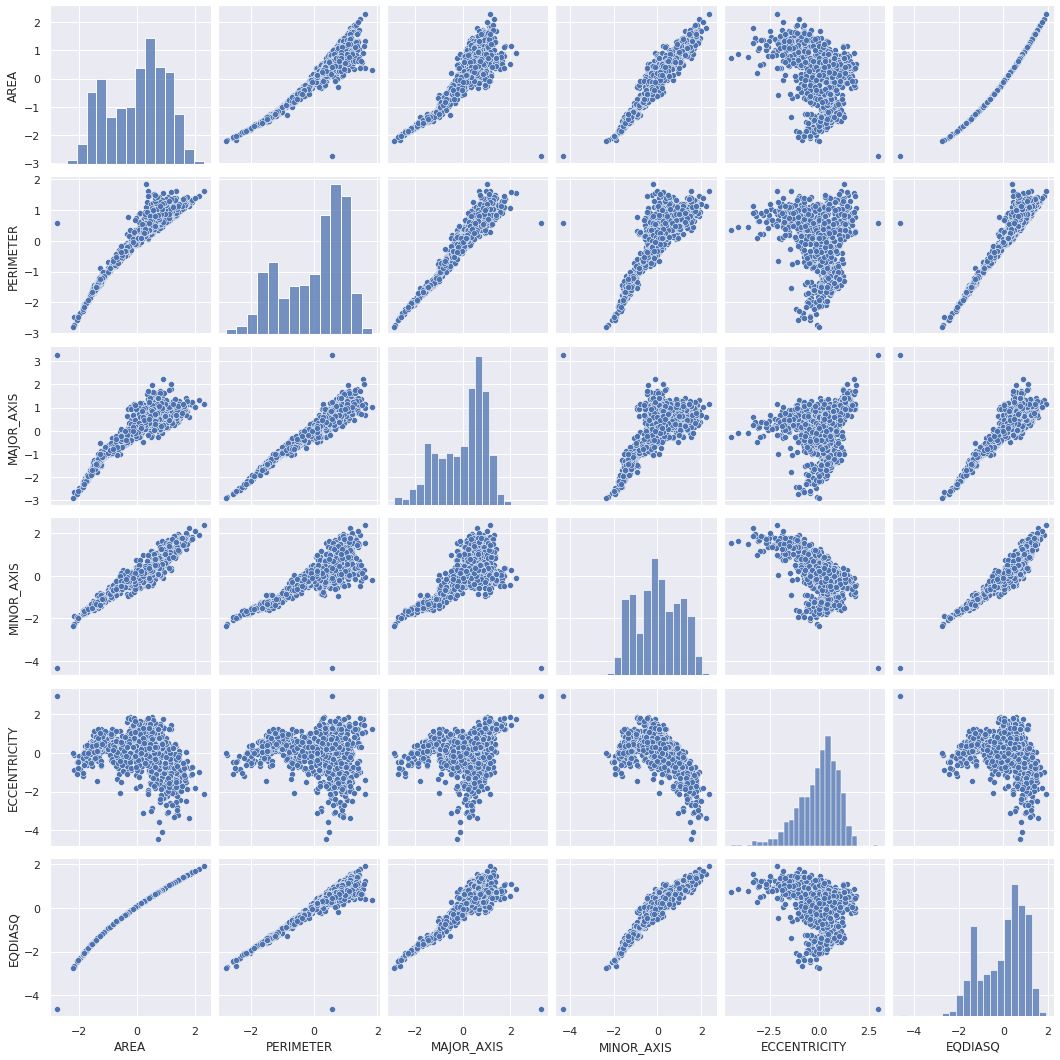

In [13]:
sns.pairplot(df)

# Covariance

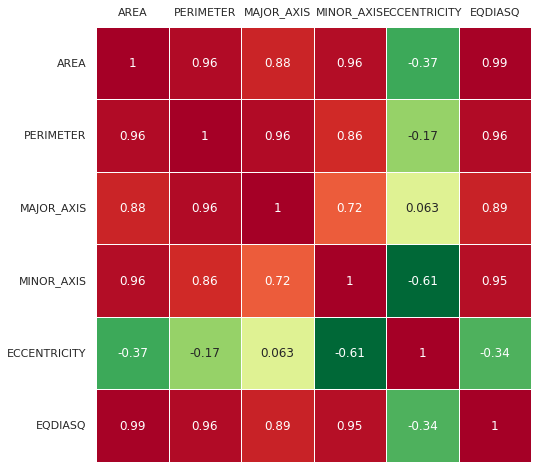

In [14]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

# Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

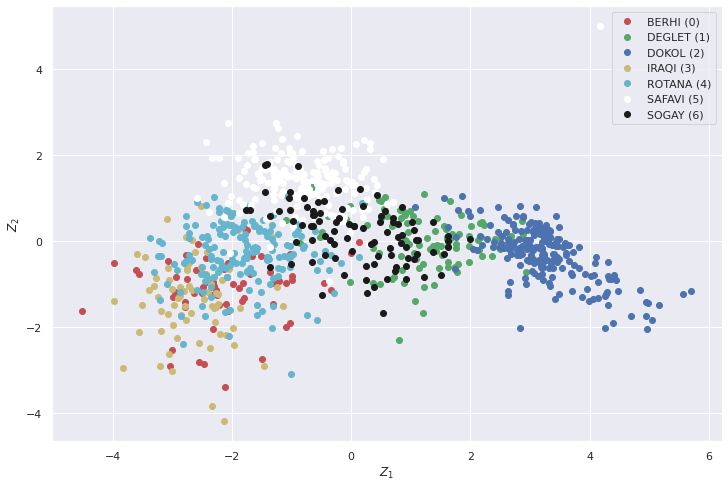

In [61]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

idx_BERHI = np.where(y == 0)
idx_DEGLET = np.where(y == 1)
idx_DOKOL = np.where(y == 2)
idx_IRAQI = np.where(y == 3)
idx_ROTANA = np.where(y == 4)
idx_SAFAVI = np.where(y == 5)
idx_SOGAY = np.where(y == 6)


plt. figure()

plt.scatter(Z[idx_BERHI,0], Z[idx_BERHI,1], c='r', label='BERHI (0)')
plt.scatter(Z[idx_DEGLET,0], Z[idx_DEGLET,1], c='g', label='DEGLET (1)')
plt.scatter(Z[idx_DOKOL,0], Z[idx_DOKOL,1], c='b', label='DOKOL (2)')
plt.scatter(Z[idx_IRAQI,0], Z[idx_IRAQI,1], c='y', label='IRAQI (3)')
plt.scatter(Z[idx_ROTANA,0], Z[idx_ROTANA,1], c='c', label='ROTANA (4)')
plt.scatter(Z[idx_SAFAVI,0], Z[idx_SAFAVI,1], c='w', label='SAFAVI (5)')
plt.scatter(Z[idx_SOGAY,0], Z[idx_SOGAY,1], c='k', label='SOGAY (6)')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

# Eigenvectors

Eigenvector matrix:
[[-0.45637815 -0.00749124 -0.26175696 -0.3191448   0.76217511  0.20095237]
 [-0.44415448  0.19726081  0.41962709  0.74165317  0.19375324 -0.01176152]
 [-0.40845283  0.40197222  0.51282247 -0.56194402 -0.30420165  0.01667353]
 [-0.4377455  -0.26141628 -0.3169309   0.12355244 -0.48604417  0.62296955]
 [ 0.16899134  0.85474024 -0.42484379  0.12732133 -0.03751658  0.20676215]
 [-0.45544799  0.02304408 -0.45986092  0.02898562 -0.22663562 -0.72688387]]


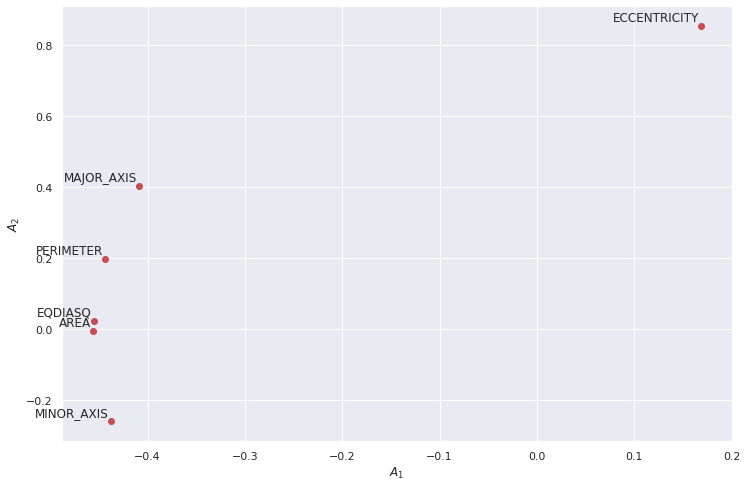

In [63]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


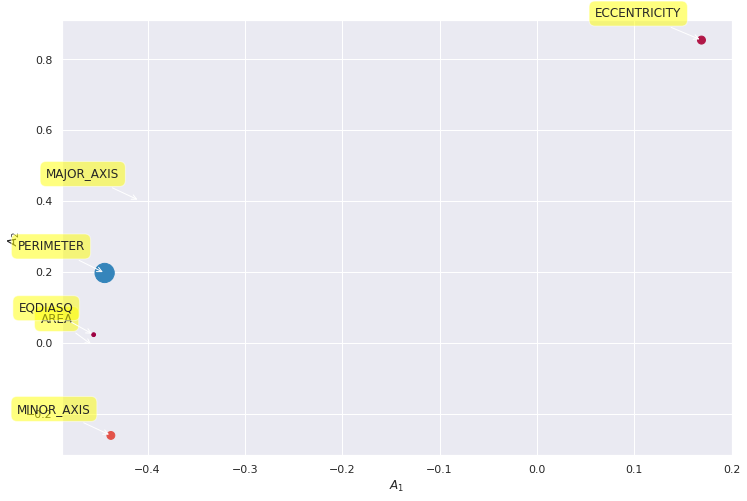

In [17]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Scree plot

Eigenvalues:
[4.76703198e+00 1.17237225e+00 4.48977812e-02 1.26257468e-02
 6.30930730e-03 3.45190463e-03]


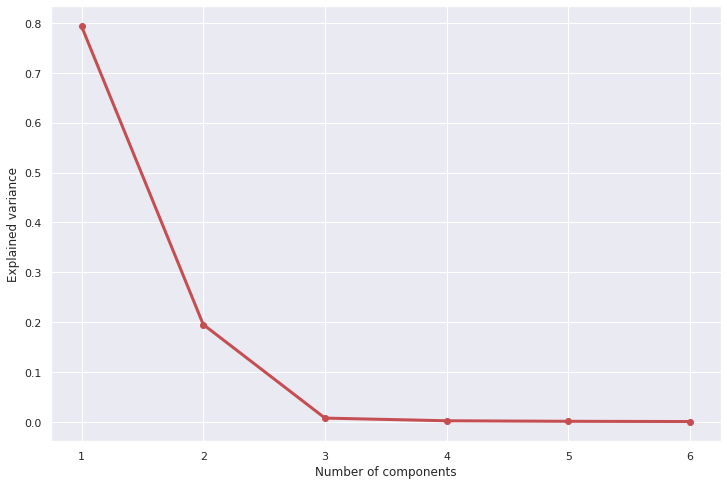

In [64]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

# Explained Variance


Text(0, 0.5, 'Cumulative explained variance')

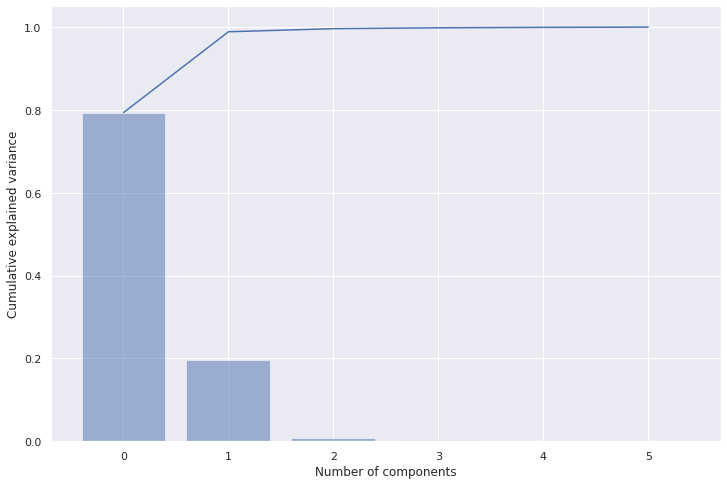

In [19]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Explained Variance per PC


In [20]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (79.4%)',
 '1': 'PC 2 (19.5%)',
 '2': 'PC 3 (0.7%)',
 '3': 'PC 4 (0.2%)',
 '4': 'PC 5 (0.1%)',
 '5': 'PC 6 (0.1%)'}

# Biplot

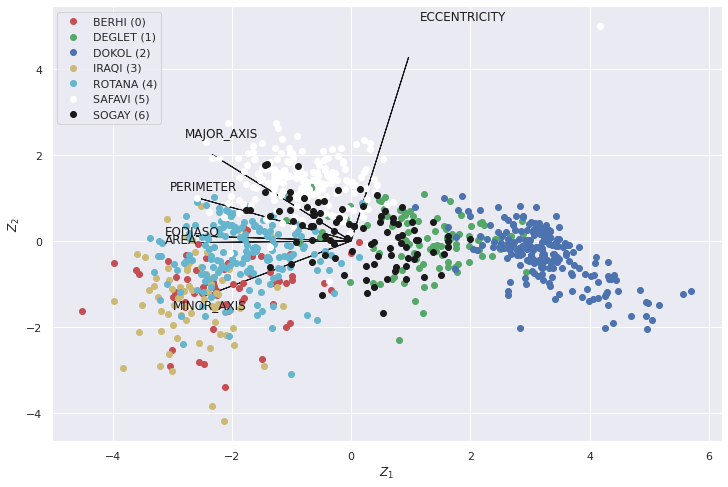

In [21]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_BERHI,0], Z[idx_BERHI,1], c='r', label='BERHI (0)')
plt.scatter(Z[idx_DEGLET,0], Z[idx_DEGLET,1], c='g', label='DEGLET (1)')
plt.scatter(Z[idx_DOKOL,0], Z[idx_DOKOL,1], c='b', label='DOKOL (2)')
plt.scatter(Z[idx_IRAQI,0], Z[idx_IRAQI,1], c='y', label='IRAQI (3)')
plt.scatter(Z[idx_ROTANA,0], Z[idx_ROTANA,1], c='c', label='ROTANA (4)')
plt.scatter(Z[idx_SAFAVI,0], Z[idx_SAFAVI,1], c='w', label='SAFAVI (5)')
plt.scatter(Z[idx_SOGAY,0], Z[idx_SOGAY,1], c='k', label='SOGAY (6)')
plt.legend(loc='upper left')

#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

# Using PCA Librarry


In [22]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
print(out['topfeat'])

    PC       feature   loading  type
0  PC1          AREA -0.456378  best
1  PC2  ECCENTRICITY  0.854740  best
2  PC1     PERIMETER -0.444154  weak
3  PC1    MAJOR_AXIS -0.408453  weak
4  PC1    MINOR_AXIS -0.437746  weak
5  PC1       EQDIASQ -0.455448  weak


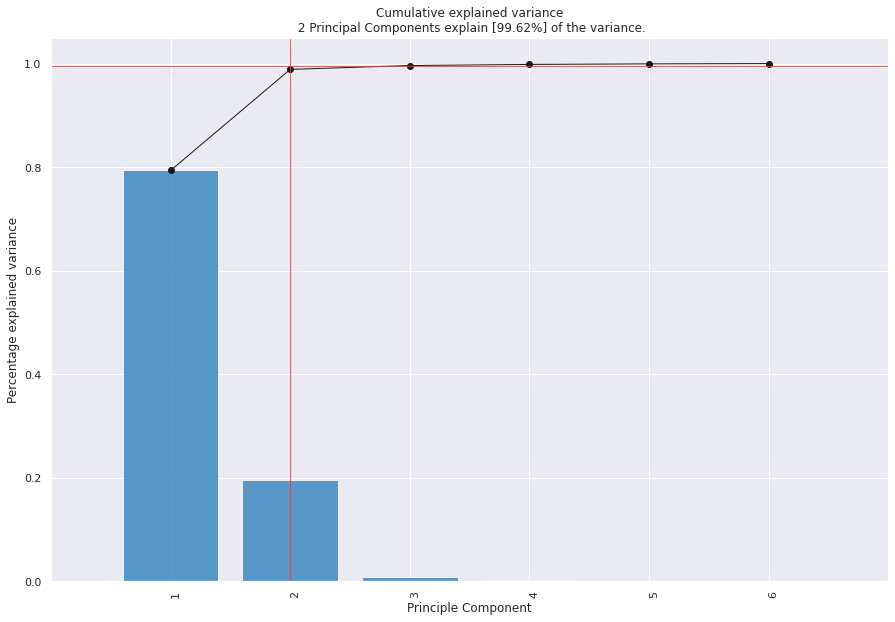

<Figure size 864x576 with 0 Axes>

In [24]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].


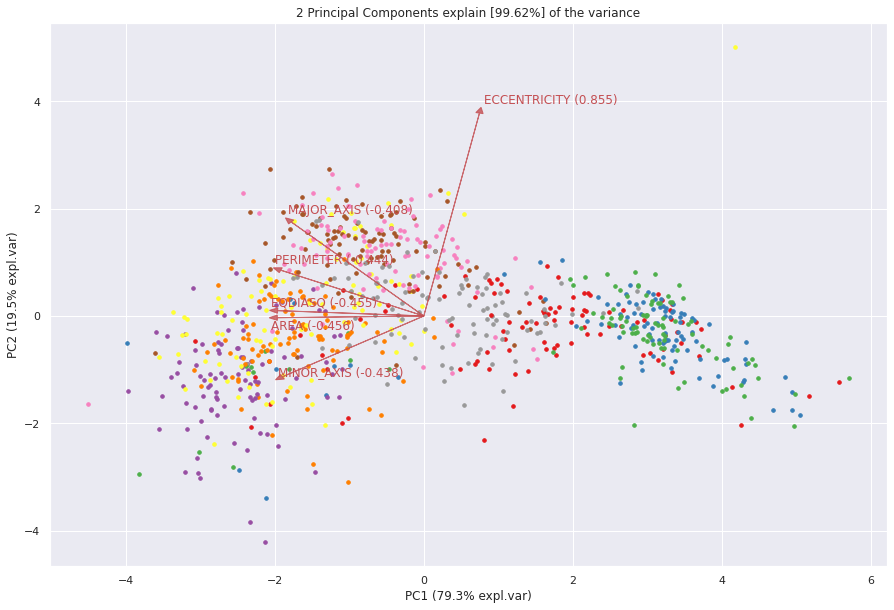

In [25]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.62%] of the variance'}, xlabel='PC1 (79.3% expl.var)', ylabel='PC2 (19.5% expl.var)'>)

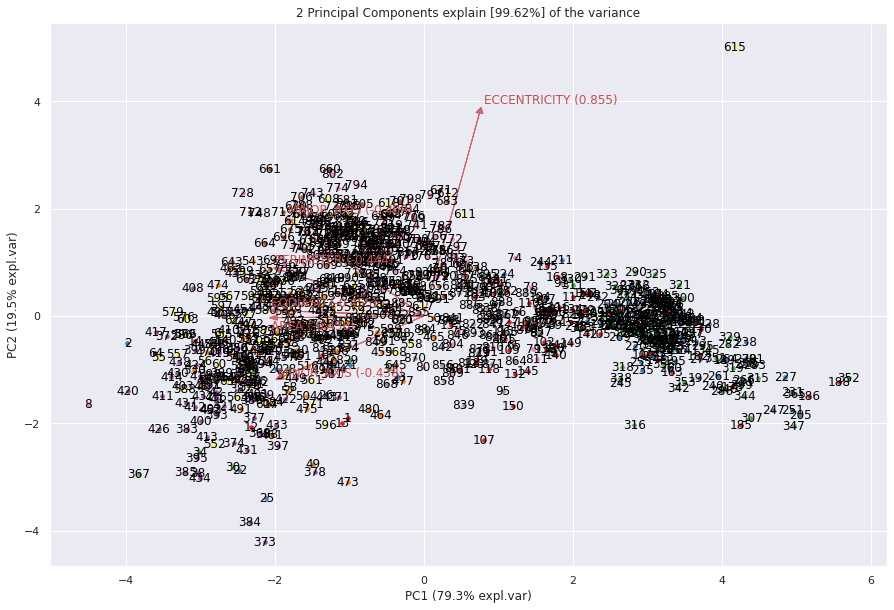

In [26]:
model.biplot(legend=False, hotellingt2=True)


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.62%] of the variance'}, xlabel='PC1 (79.3% expl.var)', ylabel='PC2 (19.5% expl.var)'>)

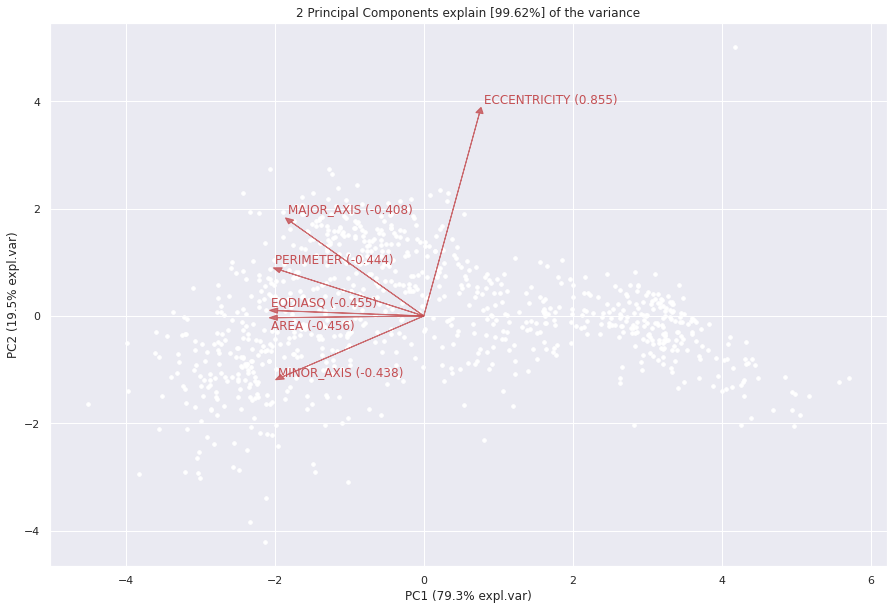

In [27]:
model.biplot(cmap=None, label=False, legend=False)

In [36]:
ax = model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


# Principal components

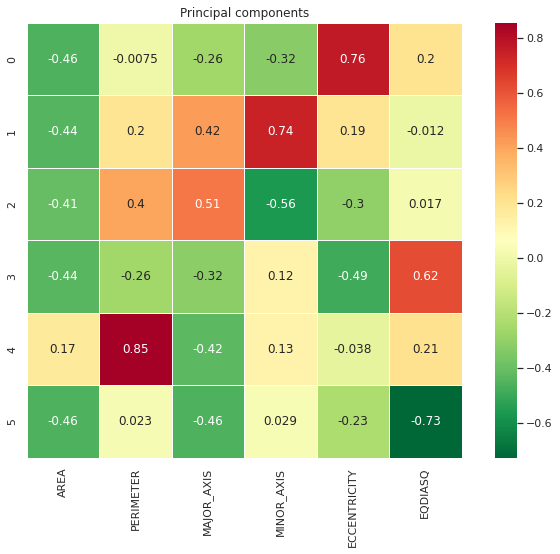

PC1:[-0.45637815 -0.44415448 -0.40845283 -0.4377455   0.16899134 -0.45544799]
PC2:[-0.00749124  0.19726081  0.40197222 -0.26141628  0.85474024  0.02304408]


In [29]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

# Hotelling's T2 test

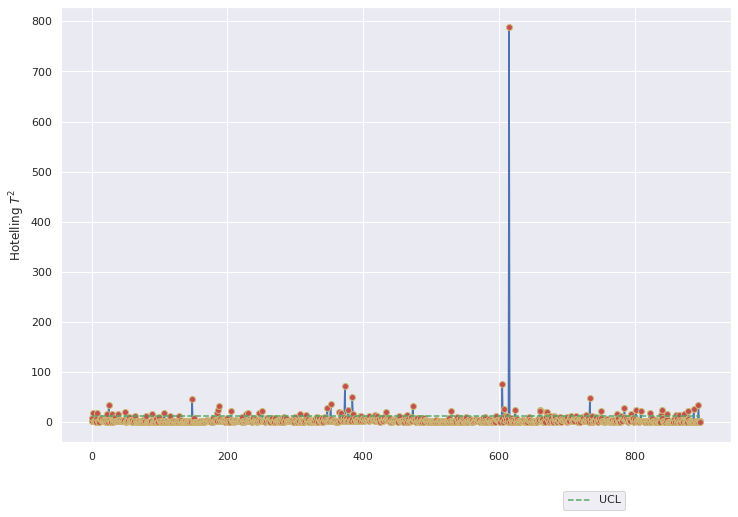

In [30]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [31]:
print(np.argwhere(Tsquare>UCL))

[[  2]
 [  8]
 [ 22]
 [ 25]
 [ 30]
 [ 38]
 [ 49]
 [ 80]
 [ 89]
 [107]
 [116]
 [128]
 [148]
 [185]
 [186]
 [188]
 [205]
 [227]
 [231]
 [247]
 [251]
 [307]
 [316]
 [347]
 [352]
 [365]
 [367]
 [373]
 [378]
 [384]
 [385]
 [408]
 [417]
 [434]
 [464]
 [473]
 [530]
 [596]
 [605]
 [608]
 [609]
 [612]
 [615]
 [624]
 [660]
 [661]
 [669]
 [671]
 [728]
 [734]
 [750]
 [774]
 [785]
 [794]
 [795]
 [802]
 [809]
 [822]
 [839]
 [841]
 [848]
 [861]
 [865]
 [873]
 [878]
 [887]
 [894]]


# Control Charts for Principal Components


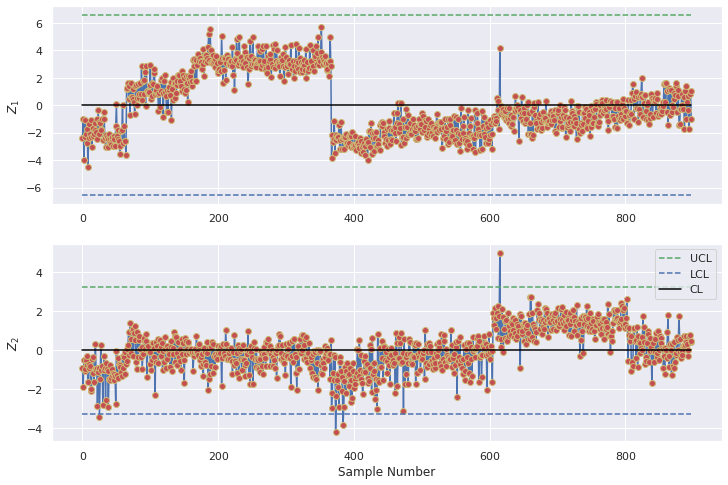

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

# Out of Control Points

In [47]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[[ 25]
 [373]
 [384]]
[[615]]


# Multi-Class Classification


In [72]:
# Test-Train Split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 628
Test Dataset Size: 270


# Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.050     0.095        20
           1      0.621     0.621     0.621        29
           2      0.934     0.934     0.934        61
           3      0.444     0.909     0.597        22
           4      0.617     0.580     0.598        50
           5      0.709     0.650     0.678        60
           6      0.250     0.286     0.267        28

    accuracy                          0.637       270
   macro avg      0.654     0.576     0.541       270
weighted avg      0.686     0.637     0.623       270



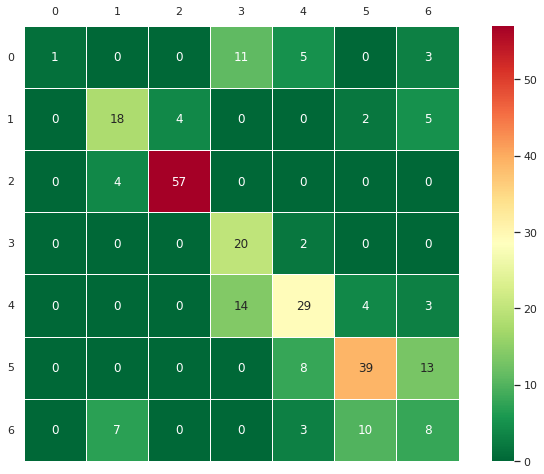

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.583     0.318     0.412        22
           1      0.410     0.640     0.500        25
           2      0.906     0.935     0.921        62
           3      0.517     0.652     0.577        23
           4      0.765     0.812     0.788        48
           5      0.896     0.741     0.811        58
           6      0.444     0.375     0.407        32

    accuracy                          0.704       270
   macro avg      0.646     0.639     0.631       270
weighted avg      0.719     0.704     0.703       270



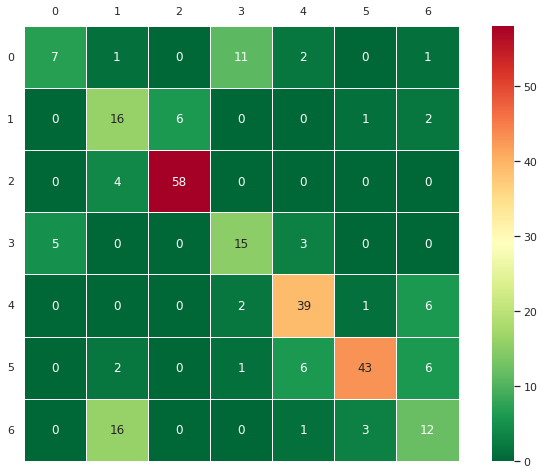

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.091     0.167        22
           1      0.459     0.680     0.548        25
           2      0.924     0.984     0.953        62
           3      0.577     0.652     0.612        23
           4      0.625     0.833     0.714        48
           5      0.787     0.828     0.807        58
           6      0.357     0.156     0.217        32

    accuracy                          0.696       270
   macro avg      0.676     0.603     0.574       270
weighted avg      0.708     0.696     0.661       270



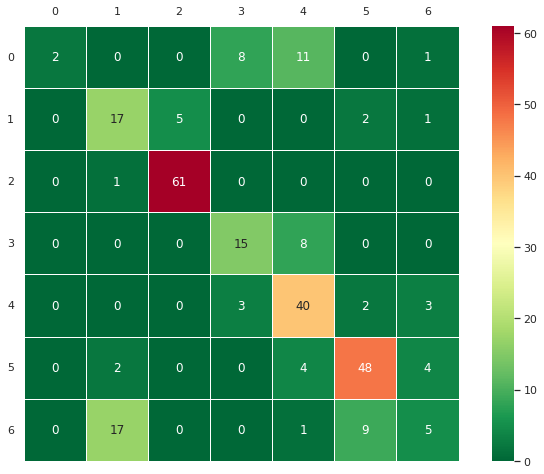

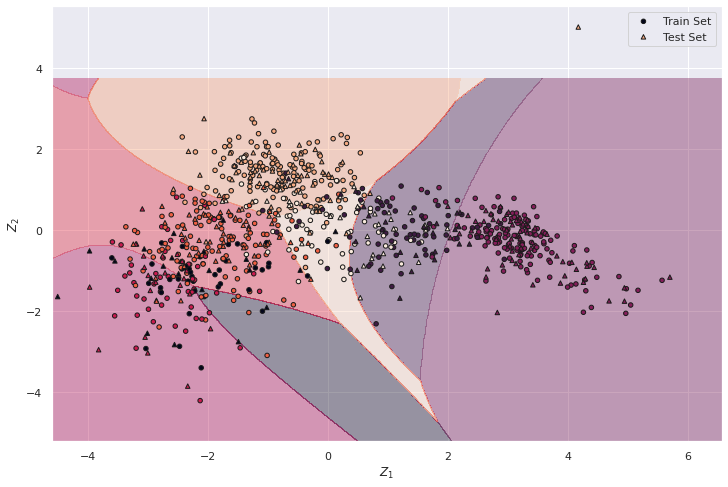

(array([  1,   3,  10,  14,  15,  17,  20,  21,  25,  29,  30,  34,  36,
        38,  42,  43,  44,  49,  50,  53,  59,  62,  64,  70,  71,  74,
        77,  78,  81,  85,  86,  88,  92,  94,  95, 100, 101, 104, 105,
       115, 116, 121, 125, 127, 129, 131, 135, 138, 142, 143, 145, 146,
       148, 152, 157, 160, 165, 168, 181, 191, 193, 201, 205, 208, 209,
       219, 225, 227, 230, 237, 238, 239, 248, 249, 250, 256, 257, 259,
       260, 264, 266, 269]),)


In [74]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

# K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 16}
k_Z: {'n_neighbors': 16}
k_Z12: {'n_neighbors': 16}
                                    0         1         2         3         4
knn_full_data fit_time       0.012420  0.004474  0.004926  0.004568  0.020100
knn_Z  fit_time              0.001997  0.002005  0.002147  0.002116  0.002061
knn_Z12 fit_time             0.002226  0.001871  0.012040  0.001894  0.002001
knn_full_data test_f1_macro  0.453508  0.404779  0.462016  0.444299  0.485639
knn_Z  test_f1_macro         0.596480  0.674244  0.662650  0.657674  0.714067
knn_Z12 test_f1_macro        0.612128  0.651291  0.627291  0.626432  0.677393

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        20
           1      0.643     0.621     0.632        29
           2      0.934     0.934     0.934        61
           3      0.455     0.682     0.545        22
           4      0.455     0.500 

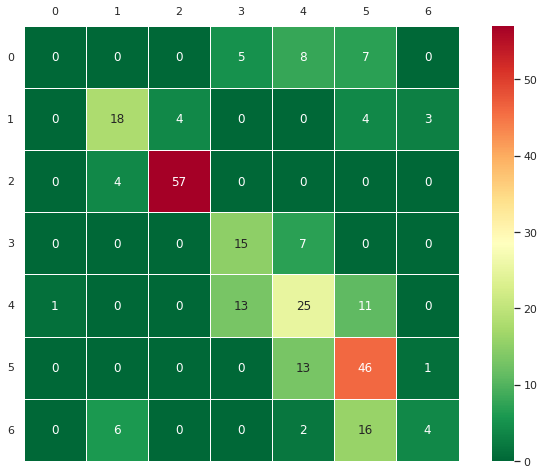

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.545     0.273     0.364        22
           1      0.424     0.560     0.483        25
           2      0.896     0.968     0.930        62
           3      0.565     0.565     0.565        23
           4      0.700     0.875     0.778        48
           5      0.774     0.828     0.800        58
           6      0.429     0.188     0.261        32

    accuracy                          0.700       270
   macro avg      0.619     0.608     0.597       270
weighted avg      0.679     0.700     0.677       270



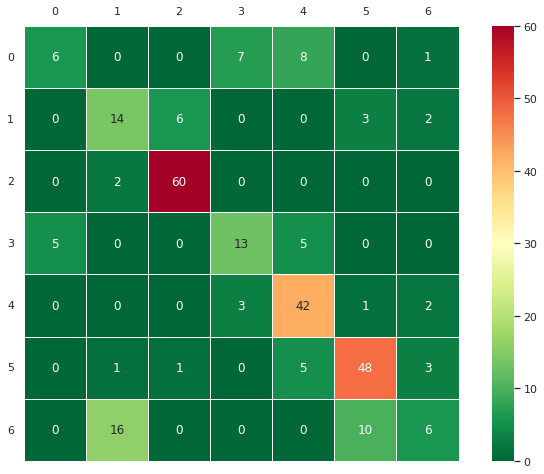

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.444     0.182     0.258        22
           1      0.429     0.600     0.500        25
           2      0.923     0.968     0.945        62
           3      0.571     0.522     0.545        23
           4      0.636     0.875     0.737        48
           5      0.806     0.862     0.833        58
           6      0.417     0.156     0.227        32

    accuracy                          0.696       270
   macro avg      0.604     0.595     0.578       270
weighted avg      0.672     0.696     0.668       270



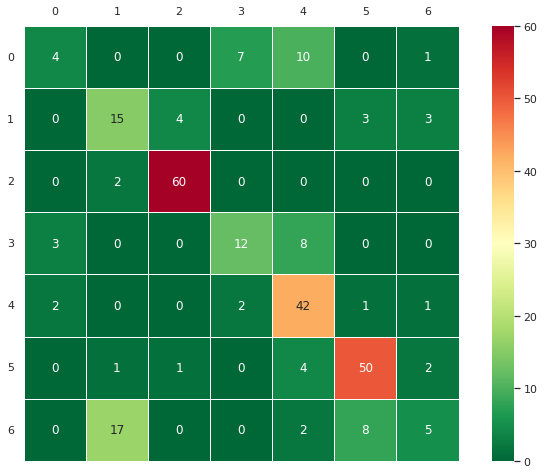

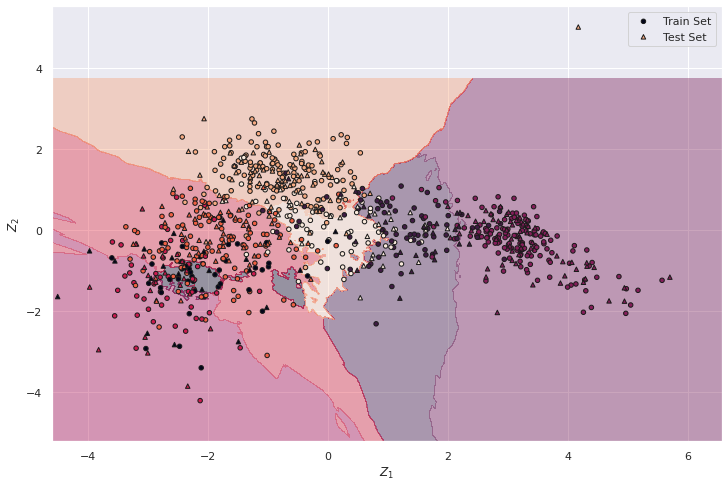

In [75]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()
   #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

# Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 4}
depth_Z: {'max_depth': 4}
depth_Z12: {'max_depth': 4}
                                   0         1         2         3         4
dt_full_data fit_time       0.005947  0.005322  0.003912  0.003839  0.003798
dt_Z  fit_time              0.002296  0.002793  0.002912  0.002404  0.002387
dt_Z12 fit_time             0.001474  0.001860  0.001529  0.001504  0.001593
dt_full_data test_f1_macro  0.788469  0.779268  0.805376  0.812808  0.790897
dt_Z  test_f1_macro         0.624941  0.557140  0.609067  0.575811  0.536349
dt_Z12 test_f1_macro        0.552647  0.593615  0.553190  0.587811  0.584825

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        20
           1      0.806     1.000     0.892        29
           2      1.000     0.934     0.966        61
           3      0.564     1.000     0.721        22
           4      1.000     1.000     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


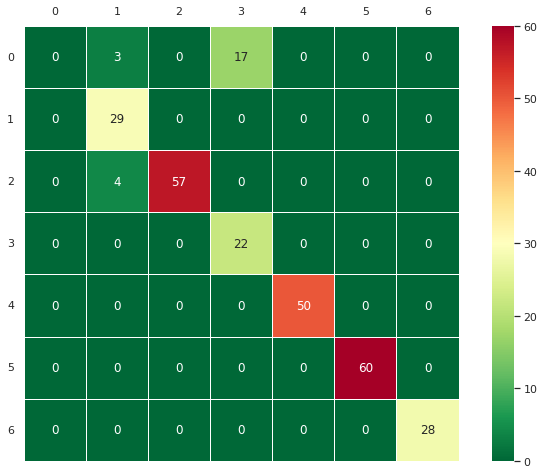

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        22
           1      0.360     0.360     0.360        25
           2      0.843     0.952     0.894        62
           3      0.435     0.870     0.580        23
           4      0.765     0.812     0.788        48
           5      0.898     0.759     0.822        58
           6      0.414     0.375     0.393        32

    accuracy                          0.678       270
   macro avg      0.531     0.590     0.548       270
weighted avg      0.642     0.678     0.651       270



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


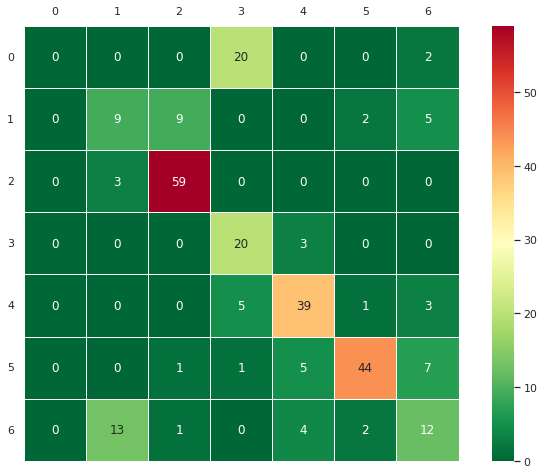

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        22
           1      0.450     0.720     0.554        25
           2      0.982     0.871     0.923        62
           3      0.500     0.696     0.582        23
           4      0.600     0.812     0.690        48
           5      0.898     0.759     0.822        58
           6      0.414     0.375     0.393        32

    accuracy                          0.678       270
   macro avg      0.549     0.605     0.566       270
weighted avg      0.658     0.678     0.659       270



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


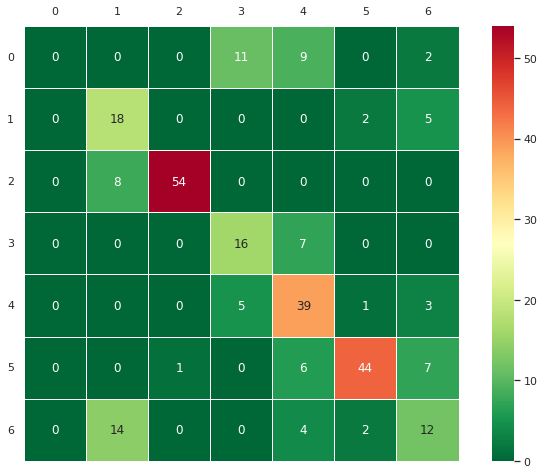

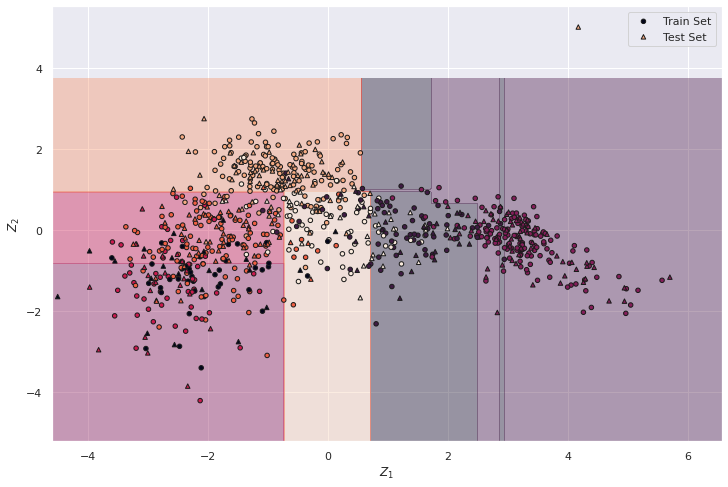

In [78]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

# ROC Curves

DATASET: FULL DATA


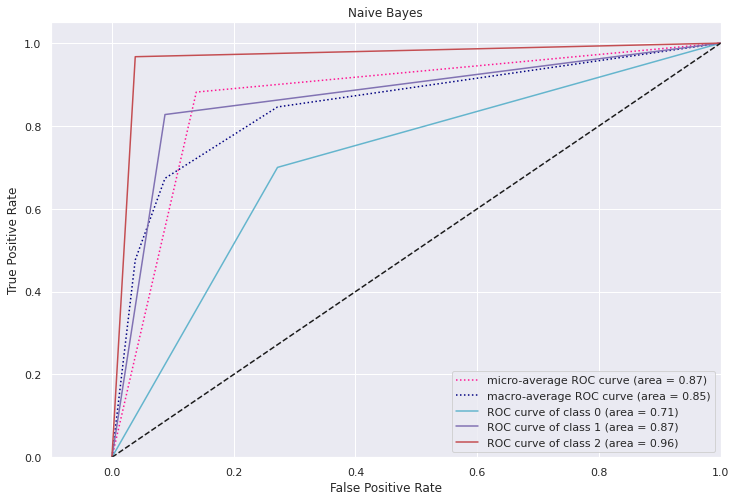

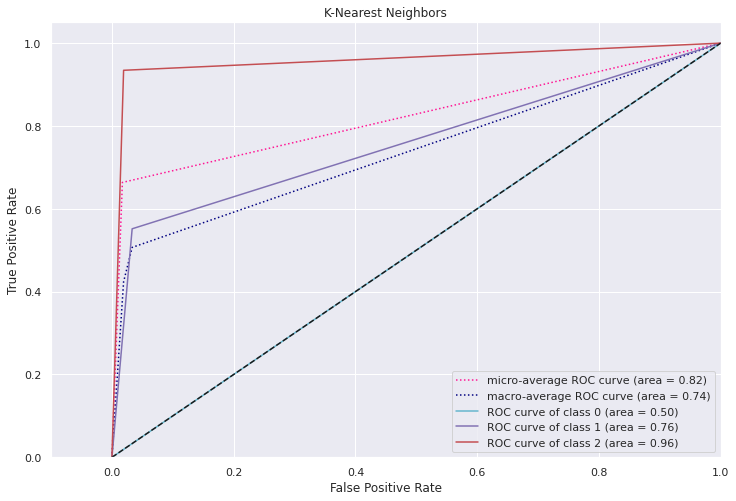

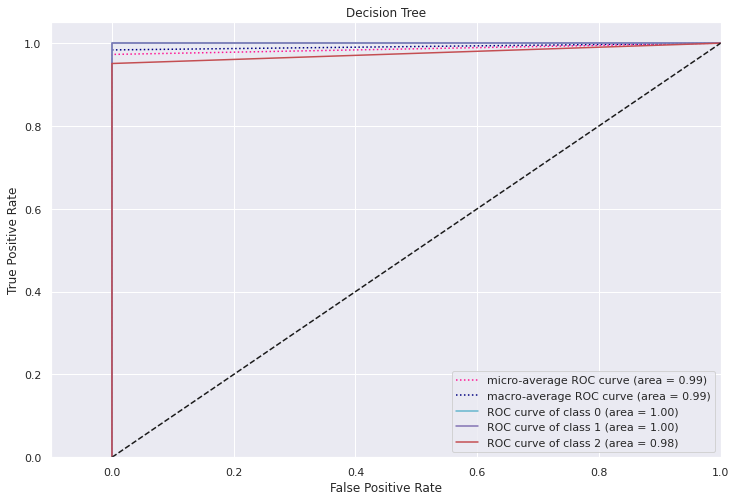

DATASET: Z


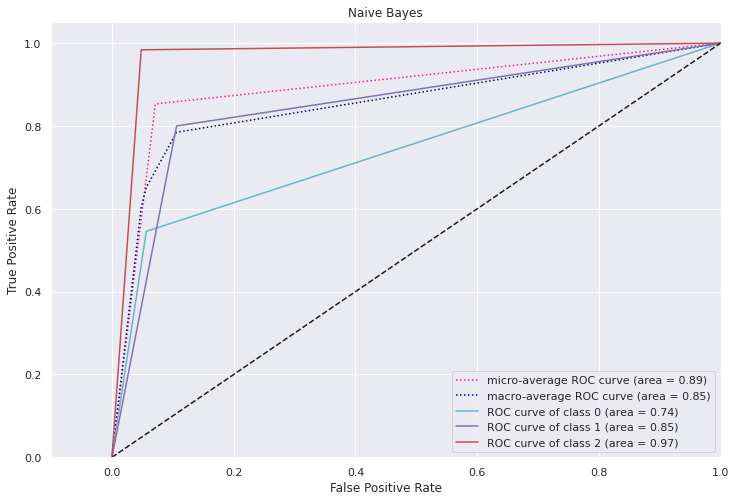

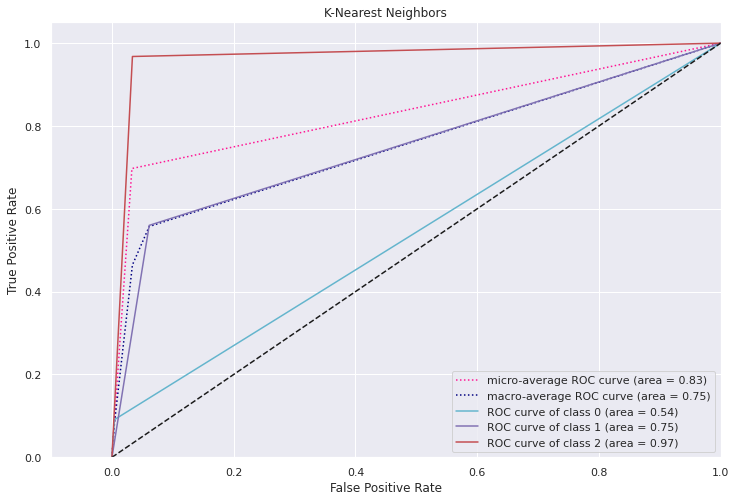

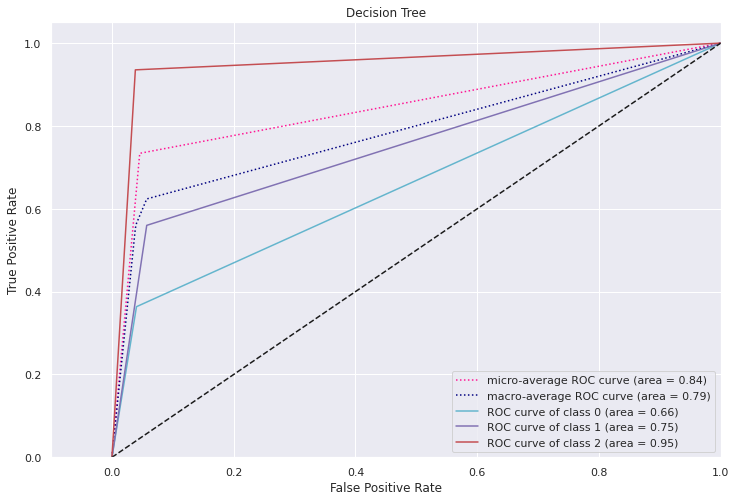

DATASET: Z12


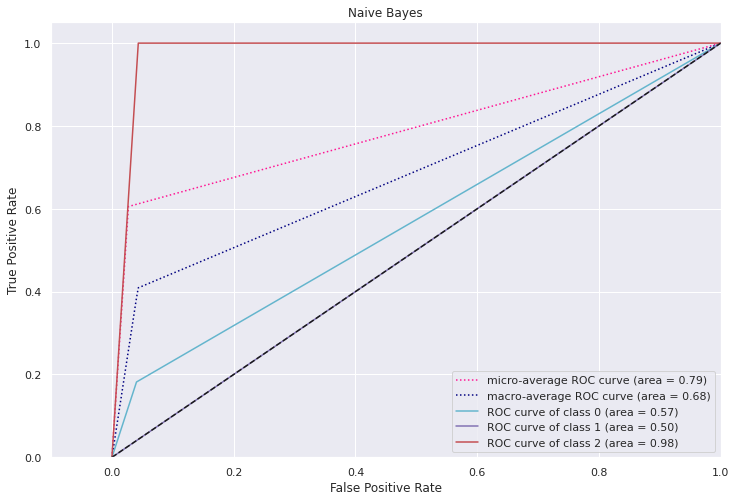

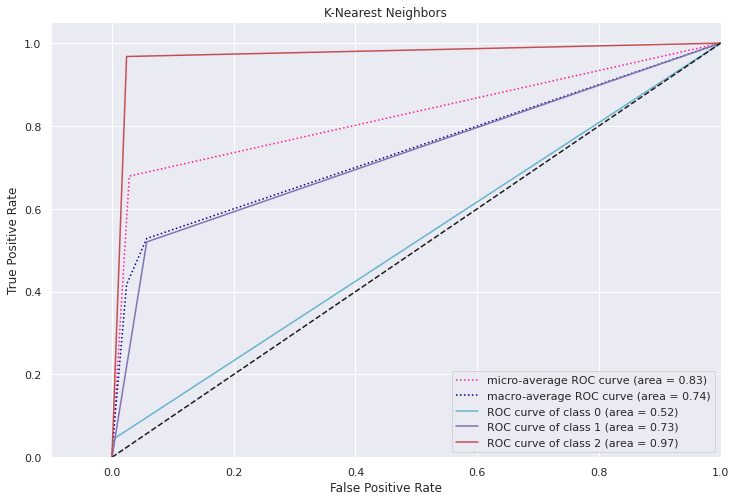

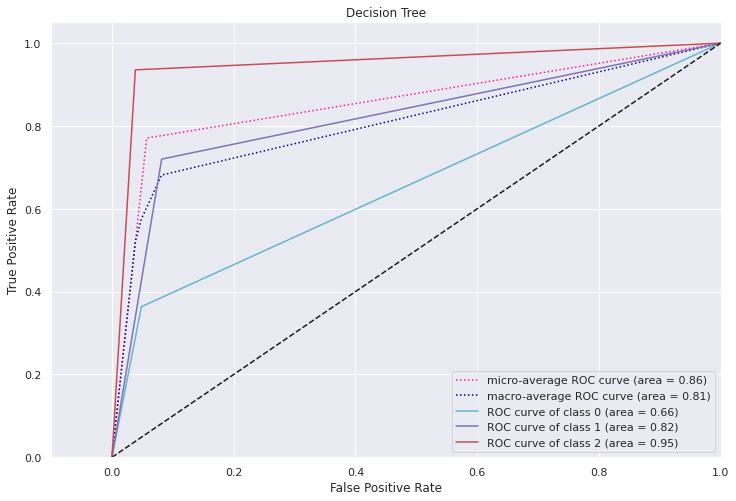

In [79]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

# Bar Chart Plot

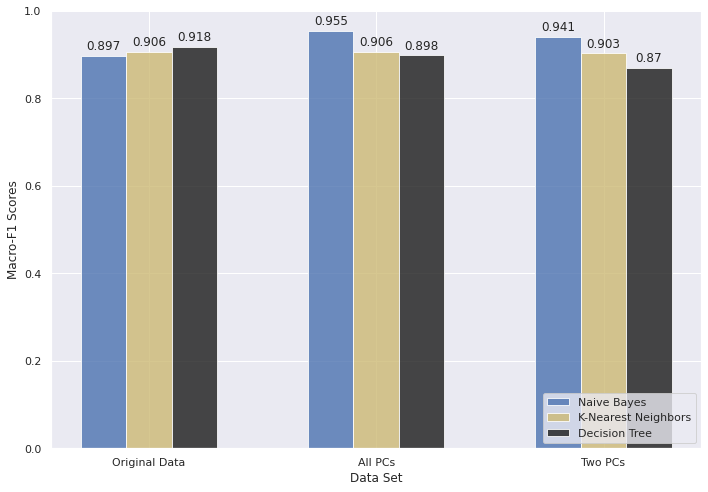

In [80]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()